In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# K-means

In [16]:
mat = loadmat("ex7data2.mat")
X = mat["X"]

In [17]:
def findClosestCentroids(X,centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
    temp = np.zeros((centroids.shape[0],1))
    
    for i in range(X.shape[0]):
        for j in range(K):
            dist = X[i,:]-centroids[j,:]
            length = np.sum(dist**2)
            temp[j] = length
        idx[i] = np.argmin(temp)+1
    return idx

In [18]:
K=3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = findClosestCentroids(X,initial_centroids)
print("Centroides mais próximos para os 3 primeiros exemplos:\n",idx[0:3])

Centroides mais próximos para os 3 primeiros exemplos:
 [[1.]
 [3.]
 [2.]]


In [19]:
def computeCentroids(X,idx,K):
    m,n = X.shape[0],X.shape[1]
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    
    for i in range(m):
        index = int((idx[i]-1)[0])
        centroids[index,:] += X[i,:]
        count[index]+=1
        
    return centroids/count

In [26]:
def plotKmeans(X,centroids,idx,K,num_iters):
    
    m,n = X.shape[0],X.shape[1]
    
    fig,ax = plt.subplots(nrows=num_iters,ncols=1,figsize = (6,36))
    
    for i in range(num_iters):
        color = "rgb"
        for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c = color[k-1],s=15)
            
        ax[i].scatter(centroids[:,0],centroids[:,1],s=120,marker="x",c="black",linewidth=3)
        title = "Número de iterações"+str(i)
        ax[i].set_title(title)
        
        centroids = computeCentroids(X,idx,K)
        
        idx = findClosestCentroids(X,centroids)
        
    plt.tight_layout()

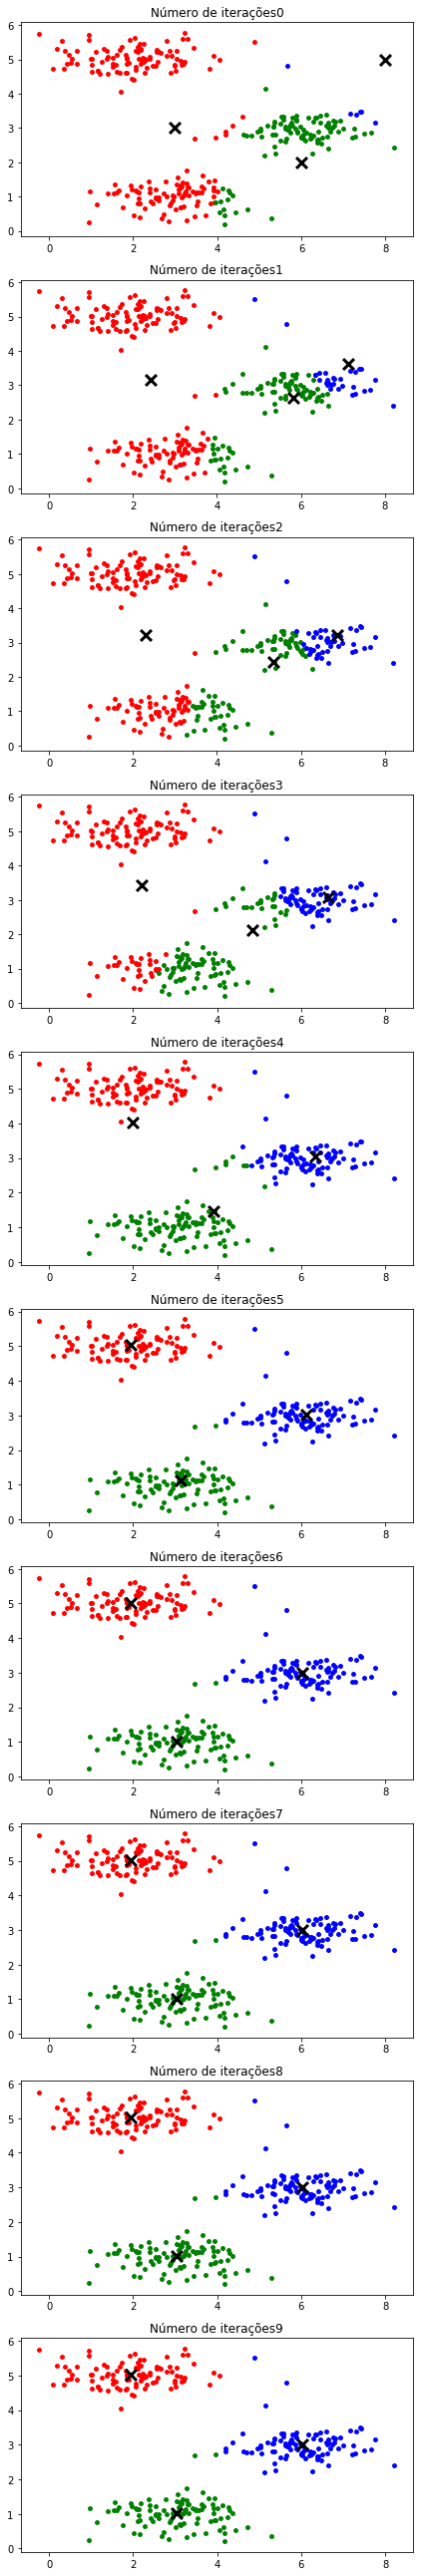

In [27]:
m,n = X.shape[0],X.shape[1]
plotKmeans(X,initial_centroids,idx,K,10)

In [30]:
def KMeansInitCentroids(X,K):
    m,n = X.shape[0],X.shape[1]
    centroids = np.zeros((K,n))
    
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m+1),:]
        
    return centroids

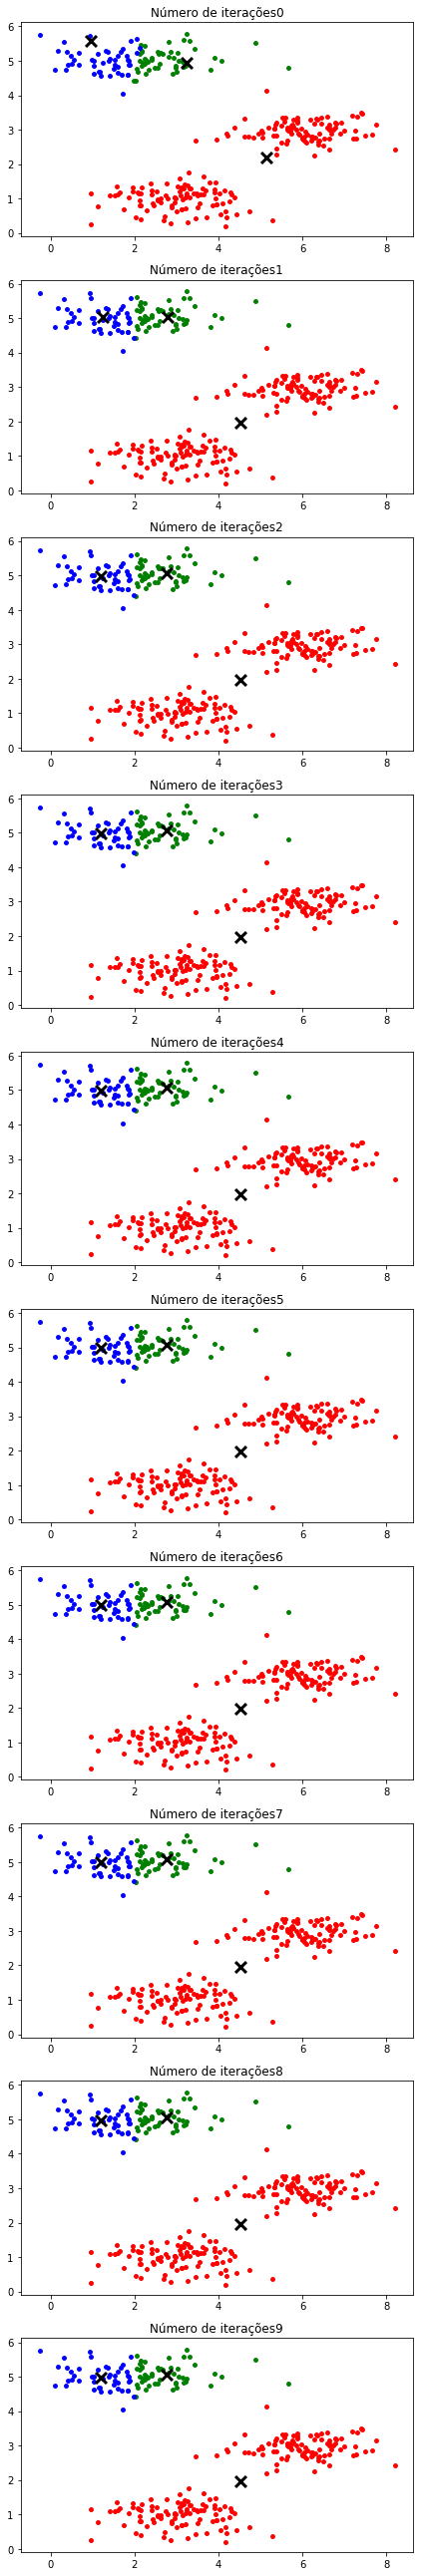

In [32]:
centroids = KMeansInitCentroids(X,K)
idx = findClosestCentroids(X,centroids)
plotKmeans(X,centroids,idx,K,10)

# Análise de Componentes Principais

In [33]:
mat3 = loadmat("ex7data1.mat")
X3 = mat3["X"]

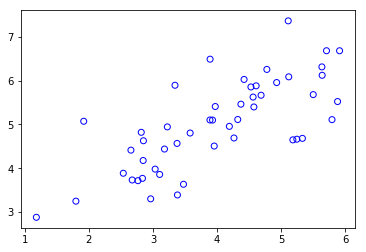

In [34]:
plt.scatter(X3[:,0],X3[:,1],marker="o",facecolors="none",edgecolors="b")

In [35]:
def featureNormalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    
    X_norm = (X-mu)/sigma
    
    return X_norm,mu,sigma

In [37]:
def pca(X):
    m,n = X.shape[0],X.shape[1]
    sigma = 1/m * X.T @ X
    U,S,V = svd(sigma)
    return U,S,V

In [38]:
from numpy.linalg import svd
X_norm,mu,std = featureNormalize(X3)
U,S = pca(X_norm)[:2]

(2, 8)

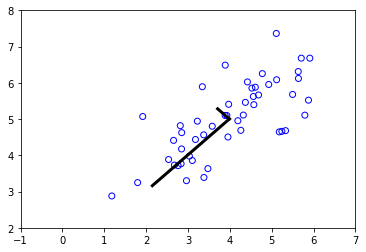

In [40]:
plt.scatter(X3[:,0],X3[:,1],marker="o",facecolors="none",edgecolors="b")
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color="black",linewidth=3)
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color="black",linewidth=3)
plt.xlim(-1,7)
plt.ylim(2,8)

In [41]:
print("Autovetor principal U(:,1) =:",U[:,0])

Autovetor principal U(:,1) =: [-0.70710678 -0.70710678]


In [43]:
def projectData(X,U,K):
    m = X.shape[0]
    U_reduced = U[:,:K]
    Z = np.zeros((m,K))
    
    for i in range(m):
        for j in range(K):
            Z[i,j] = X[i,:] @ U_reduced[:,j]
            
    return Z

In [44]:
K=1
Z = projectData(X_norm,U,K)
print("Projeção do primeiro exemplo:",Z[0][0])

Projeção do primeiro exemplo: 1.4963126084578517


In [49]:
def recoverData(Z,U,K):
    m,n = Z.shape[0],U.shape[1]
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:K]
    
    for i in range(m):
        X_rec[i,:] = Z[i,:] @ U_reduced.T
        
    return X_rec

In [50]:
X_rec = recoverData(Z,U,K)
print("Aproximação do primeiro exemplo:",X_rec[0,:])

Aproximação do primeiro exemplo: [-1.05805279 -1.05805279]


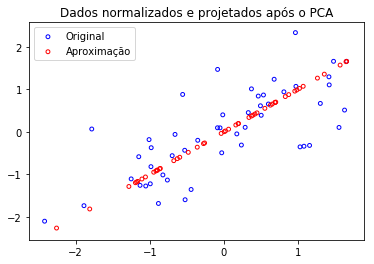

In [51]:
plt.scatter(X_norm[:,0],X_norm[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=15)
plt.scatter(X_rec[:,0],X_rec[:,1],marker="o",label="Aproximação",facecolors="none",edgecolors="r",s=15)
plt.title("Dados normalizados e projetados após o PCA")
plt.legend()